<a href="https://colab.research.google.com/github/hemrajojha/CSC410/blob/main/Unit_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Descion Tree Algorithm - ID3
#Source: https://medium.com/@lope.ai/decision-trees-from-scratch-using-id3-python-coding-it-up-6b79e3458de4

In [3]:
#import the required libraries
import numpy as np
import pandas as pd
eps = np.finfo(float).eps #‘eps’ here is the smallest representable number. At times we get log(0) or 0 in the denominator, to avoid that we are going to use this
from numpy import log2 as log

In [4]:
#create attributes for dataset
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [5]:
outlook

['overcast',
 'overcast',
 'overcast',
 'overcast',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'sunny',
 'sunny',
 'sunny',
 'sunny',
 'sunny']

In [6]:
#create dataset
#used dict here, for reference: https://www.w3schools.com/python/python_dictionaries.asp
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}


In [7]:
#create dataframe
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play']) # or df = pd.DataFrame(dataset)

In [8]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


**ID3 algorithm**

1.compute the entropy for data-set

2.for every attribute/feature:

       1.calculate entropy for all categorical values
       2.take average information entropy for the current attribute
       3.calculate gain for the current attribute

3. pick the highest gain attribute.
4. Repeat until we get the tree we desired

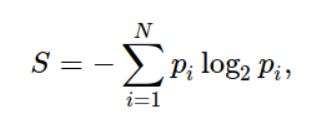

In [9]:
#find entropy for the whole dataset
entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    print(f'{value}:{fraction}')
    entropy_node += -fraction*np.log2(fraction)
    print(entropy_node)

yes:0.6428571428571429
0.40977637753840174
no:0.35714285714285715
0.9402859586706309


In [16]:
#define a function to calculate entropy of each attribute
def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Sweet')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            print(num)
            den = len(df[attribute][df[attribute]==variable])  #denominator
            print(den)
            fraction = num/(den+eps)  #pi
            print(fraction)
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'Sweet'
        fraction2 = den/len(df)
        print(fraction2)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste
        print(entropy_attribute)

    return(abs(entropy_attribute))

In [17]:
#for outlook attribute
ent(df,df.keys()[0]) 

4
4
1.0
0
4
0.0
0.2857142857142857
9.152647153756907e-17
3
5
0.6
2
5
0.4
0.35714285714285715
-0.34676806944809563
2
5
0.4
3
5
0.6
0.35714285714285715
-0.6935361388961914


0.6935361388961914